# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()
med_charges.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [4]:
np.random.seed(47)
N_rep = 10000

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicates = np.empty(N_rep)

for i in range(N_rep):
    bs_replicates[i] = bootstrap_replicate_1d(med_charges.charges, np.mean)

# one-tail
conf_int = np.percentile(bs_replicates, [5])
print(conf_int)

[12724.4679217]


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

  H0 = There is no difference in std between the insured and non-insured 
  H1 = There is a difference in std between the insured and non-insured charges

In [13]:
insurance = med_charges.loc[med_charges.insuranceclaim== 1, 'charges']
no_insurance = med_charges.loc[med_charges.insuranceclaim== 0, 'charges']

#print(len(insurance), len(no_insurance) )

0       16884.92400
1        1725.55230
4        3866.85520
6        8240.58960
10       2721.32080
11      27808.72510
12       1826.84300
13      11090.71780
14      39611.75770
16      10797.33620
18      10602.38500
19      36837.46700
20      13228.84695
21       4149.73600
22       1137.01100
23      37701.87680
25      14001.13380
28       2775.19215
29      38711.00000
30      35585.57600
31       2198.18985
33      13770.09790
34      51194.55914
38      39774.27630
39      48173.36100
40       3046.06200
45      20630.28351
47       3556.92230
49      38709.17600
50       2211.13075
           ...     
1284    47403.88000
1286     3732.62510
1288    38344.56600
1289     7147.47280
1291    34828.65400
1293     9301.89355
1296     1708.92575
1300    62592.87309
1301    46718.16325
1303    37829.72420
1304    21259.37795
1305     2464.61880
1306    16115.30450
1308    33900.65300
1311     4571.41305
1312     4536.25900
1313    36397.57600
1317     1163.46270
1321    28101.33305


In [6]:
#use above reset
np.random.seed(47)
N_rep = 10000

bs_rep_ins_std = np.empty(N_rep)
bs_rep_no_ins_std = np.empty(N_rep)

for i in range(N_rep):
    bs_rep_ins_std[i] = bootstrap_replicate_1d(insurance, np.std)
    bs_rep_no_ins_std[i] = bootstrap_replicate_1d(no_insurance, np.std)

bs_replicates_std_diff = bs_rep_ins_std - bs_rep_no_ins_std

conf_int = np.percentile(bs_replicates_std_diff, [2.5, 97.5])

print('Since the confidence interval is between {} and cannot be equal to zero (in case there was no difference) , the null hypothesis can be rejected.'.format(conf_int))

Since the confidence interval is between [6681.572467   8502.74820416] and cannot be equal to zero (in case there was no difference) , the null hypothesis can be rejected.


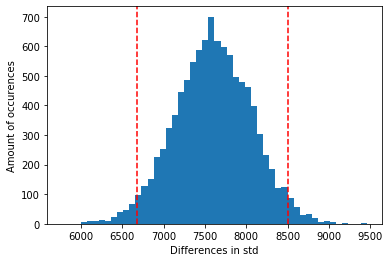

In [7]:
#Plot histogram
_ = plt.hist(bs_replicates_std_diff, bins=50)
_ = plt.xlabel('Differences in std')
_ = plt.ylabel('Amount of occurences')
_ = plt.axvline(np.percentile(bs_replicates_std_diff, 2.5),linestyle='--',color='r')
_ = plt.axvline(np.percentile(bs_replicates_std_diff, 97.5),linestyle='--',color='r')
plt.show()

Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__ H0 = no difference between the insured and non-insured
H1 = there is a differnce between the insured and non-insured

In [9]:
diff_mean= np.mean(insurance) - np.mean(no_insurance)
print(f'The difference in means is {diff_mean}', ', therefore we need to make a shift so that the means will be the same')

The difference in means is 7602.506384231368 , therefore we need to make a shift so that the means will be the same


In [10]:
# Test Statistics , compare observed with sample under null hypothesis
# bootstrap replicate by making a new array based on the function and data given 
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)

    return bs_replicates

In [17]:
both_insurance = np.concatenate([insurance, no_insurance])
perm_both_insurance = np.random.permutation(both_insurance)
sample_1 = perm_both_insurance[:len(no_insurance)]
sample_0 = perm_both_insurance[len(no_insurance):]

In [22]:
mean_concat = np.mean(both_insurance)
print(np.mean(insurance) - np.mean(no_insurance))
print(np.mean(sample_1) - np.mean(sample_0))
#Generate shifted arrays
ins_shifted = insurance - np.mean(insurance) + mean_concat
no_ins_shifted = no_insurance - np.mean(no_insurance) + mean_concat
# Compute 10000 from shifted arrays:
bs_rep_ins = draw_bs_reps(ins_shifted, np.mean, size=10000)
bs_rep_no_ins = draw_bs_reps(no_ins_shifted, np.mean, size=10000)

# Get replicates of difference means
bs_replicates = bs_rep_ins - bs_rep_no_ins

empirical_diff_means = np.mean(insurance) - np.mean(no_insurance)
p = np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates) 
print(f'The value of p is {p}')

7602.506384231368
72.83622935407584
The value of p is 0.0


Value of p is smaller than 0.05, therefore H0 can be rejected

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

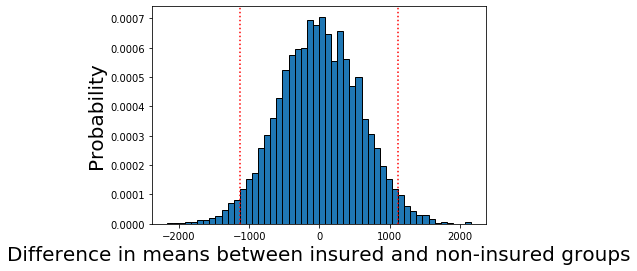

In [23]:
# Plotting in histogram
plt.hist(bs_replicates, bins=50, density=True,ec = 'black')
plt.xlabel("Difference in means between insured and non-insured groups", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.axvline(np.percentile(bs_replicates, 2.5),linestyle=':',color='r')
plt.axvline(np.percentile(bs_replicates, 97.5),linestyle=':',color='r')
plt.show()



__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ I don't understand the question, but logically i would say that you always want to work with larger datasets and samples since it will make the outcome more accurate towards a population

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ Bootstrapping because one can apply permutation and have a more accurate outcome

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ A/B testing would be better since it is very good applicable for click-statistics. 

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.